## Install & Import Python Library

In [1]:

!pip install pymongo

     |████████████████████████████████| 506 kB 17.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 24.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install tweepy


     |████████████████████████████████| 64 kB 2.6 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 22.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:

!pip install twitter

     |████████████████████████████████| 50 kB 1.3 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [10]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

## Config Info

In [11]:

config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Load Athorization Information

In [12]:
client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

# Rest API to Collect Tweets

In [13]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [22]:

count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,15mi"  # defin the location, in Harrisonburg, VA
q = "covid19" #REMEMBER FOR QUIZ 

In [23]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&oauth_consumer_key=LDU2XLJNg31MArMSfrtaatr21&oauth_nonce=37488607460125689&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1636053355&oauth_token=60388598-nnxqxHspPFBPOnQFqoIoQmfjWk5TWUtMIuyfnTXeo&oauth_version=1.0&q=covid19&oauth_signature=E3k7qOlnrRuBcIlQrTNKFr8l3ew%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

In [24]:

since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                       max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&max_id=1453803322704601091&oauth_consumer_key=LDU2XLJNg31MArMSfrtaatr21&oauth_nonce=11307705246119732851&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1636053356&oauth_token=60388598-nnxqxHspPFBPOnQFqoIoQmfjWk5TWUtMIuyfnTXeo&oauth_version=1.0&q=covid19&oauth_signature=r8CotAn6fr4Hd8VzQ0%2B0iJ1V74U%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

## View Collected Tweets 

In [26]:

print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users

4855
4220


In [32]:

tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index

'text_index'

In [35]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vote

In [36]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: mascot2020
text: RT @Gtv_Luna: ☣️Stop the #COVID19 💉 #vaccines ‼️
#Vaccine #Vaccination #MandatoryVaccination #VaccinePassport https://t.co/aCk3qkfMTm
----
name: Caroline Chatelain
text: RT @Prefet51: #Vaccination
Cette année, vous pouvez faire votre vaccination contre la #Grippe en même temps que votre vaccination ou votre…
----
name: Exebee88
text: RT @BernieSpofforth: AUSTRALIA  - outbreak at a gym, where you had to be fully vaccinated AND prove it with a vaccine passport to enter.

T…
----
name: kmckenna
text: RT @picardonhealth: Vaccine Policy Should Consider the Power of ‘Hybrid Immunity.’ The effectiveness of #COVID19 vaccines is not in doubt,…
----
name: Kathleen Lessman
text: RT @BernieSpofforth: AUSTRALIA  - outbreak at a gym, where you had to be fully vaccinated AND prove it with a vaccine passport to enter.

T…
----
name: Theta moonboy
text: RT @BernieSpofforth: AUSTRALIA  - outbreak at a gym, where you had to be fully vaccinated AND prove it with a vaccine passp

In [37]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vote

In [38]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,extended_entities,metadata,source,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status
0,61843146caa0d2f99123a853,Thu Oct 28 19:30:13 +0000 2021,1453806325574475776,1453806325574475776,RT @Gtv_Luna: ☣️Stop the #COVID19 💉 #vaccines ...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'media': [{'id': 1453498932185559040, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,False,7,0,False,False,False,en,NaN,NaN,NaN
1,61843113caa0d2f991239e4e,Thu Oct 28 19:59:22 +0000 2021,1453813661638832135,1453813661638832135,"RT @Prefet51: #Vaccination\nCette année, vous ...",False,"{'hashtags': [{'text': 'Vaccination', 'indices...",NaN,"{'iso_language_code': 'fr', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,False,3,0,False,False,NaN,fr,NaN,NaN,NaN
2,6184315bcaa0d2f99123ac5a,Thu Oct 28 19:18:42 +0000 2021,1453803427767721985,1453803427767721985,RT @BernieSpofforth: AUSTRALIA - outbreak at ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,False,1465,0,False,False,NaN,en,NaN,NaN,NaN
3,61843153caa0d2f99123aae3,Thu Oct 28 19:22:46 +0000 2021,1453804451945455621,1453804451945455621,RT @picardonhealth: Vaccine Policy Should Cons...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,False,3,0,False,False,NaN,en,NaN,NaN,NaN
4,61843146caa0d2f99123a83d,Thu Oct 28 19:30:25 +0000 2021,1453806378410250249,1453806378410250249,RT @BernieSpofforth: AUSTRALIA - outbreak at ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,False,1465,0,False,False,NaN,en,NaN,NaN,NaN
5,61843139caa0d2f99123a5be,Thu Oct 28 19:37:49 +0000 2021,1453808239515160576,1453808239515160576,RT @BernieSpofforth: AUSTRALIA - outbreak at ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,False,1465,0,False,False,NaN,en,NaN,NaN,NaN
6,61843138caa0d2f99123a589,Thu Oct 28 19:38:17 +0000 2021,1453808359270928384,1453808359270928384,"RT @CristianTerhes: #Vaccines up, infection ca...",False,"{'hashtags': [{'text': 'Vaccines', 'indices': ...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,False,208,0,False,False,NaN,en,NaN,NaN,NaN
7,61843134caa0d2f99123a49e,Thu Oct 28 19:40:56 +0000 2021,1453809023774568449,1453809023774568449,RT @BernieSpofforth: AUSTRALIA - outbreak at ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,False,1465,0,False,False,NaN,en,NaN,NaN,NaN
8,61843125caa0d2f99123a1ca,Thu Oct 28 19:49:09 +0000 2021,1453811091235037184,1453811091235037184,RT @BernieSpofforth: AUSTRALIA - outbreak at ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,False,1465,0,False,False,NaN,en,NaN,NaN,NaN
9,61843116caa0d2f991239ee0,Thu Oct 28 19:57:39 +0000 2021,1453813230091083795,1453813230091083795,RT @BernieSpofforth: AUSTRALIA - outbreak at ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,False,1465,0,False,False,NaN,en,NaN,NaN,NaN


<AxesSubplot:>

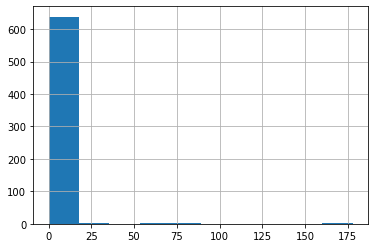

In [39]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count